# New Approach

<hr>

### Team information
**1. Ayushi Sharma  (    /3rd Year)** <br>
**2. Harsh Bamotra  (5rd /3nd Year)** <br>
**3. Pratham Sharma (5rd /3nd Year)** <br>

Supervisor    : **Prof. Vibha Gaur** <br>
Course        : **BSc. (H) Computer Science** <br>
College       : **Acharya Narendra Dev College** <br>

## Power Consumption

Importing required libraries
- pandas
- numpy
- matplotlib
- os
- requests

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import os
import requests

Reading the following csv files:
- Hybrid Method - Hashrate.csv
- Hybrid Method - EOH2021.csv

In [2]:
hr=pd.read_csv("Hybrid Method - Hashrate.csv")
ef=pd.read_csv("Hybrid Method - EOH2021.csv")

Droping unwanted extra attributes

In [3]:
hr = hr[['Year', 'hash-rate']]
ef = ef[['Year', 'Efficiency(J/TH)']]

Calculating year wise total hash-rate

In [4]:
Year_HR = hr.groupby(['Year'] , as_index=False).agg({"hash-rate" : "sum"})
Year_HR.columns = ['Year' , 'Hash-rate']
Year_HR = Year_HR.drop(13)
Year_HR.head()

,Year,Hash-rate
0,2009,0.000545
1,2010,1.868648
2,2011,774.956000
3,2012,1919.440000
4,2013,173377.200000


Calculating year wise min efficiency of the hardware to calculate the upper bound

In [5]:
Year_MinEF = ef.groupby(['Year'] , as_index=False).agg({"Efficiency(J/TH)" : "min"})
Year_MinEF.columns = ['Year' , 'Efficiency(J/TH)']
Year_MinEF.head()

,Year,Efficiency(J/TH)
0,2009,14313725.49
1,2010,2405161.29
2,2011,43000.00
3,2012,65000.00
4,2013,2000.00


Calculating year wise max efficiency of the hardware to calculate the lower bound

In [6]:
Year_MaxEF = ef.groupby(['Year'] , as_index=False).agg({"Efficiency(J/TH)" : "max"})
Year_MaxEF.columns = ['Year' , 'Efficiency(J/TH)']
Year_MaxEF.head()

,Year,Efficiency(J/TH)
0,2009,1.431373e+07
1,2010,2.405161e+06
2,2011,6.787879e+06
3,2012,6.500000e+04
4,2013,9.916667e+03


Calculating the annual power consumption

In [7]:
Consumption = pd.DataFrame()
Consumption["Year"] = np.arange(2009, 2022, 1)
Consumption["Hash-rate"] = Year_HR["Hash-rate"]
Consumption["Lower Bound"] = Consumption["Hash-rate"]*Year_MinEF["Efficiency(J/TH)"]*24*3*(10**-3)
Consumption["Upper Bound"] = Consumption["Hash-rate"]*Year_MaxEF["Efficiency(J/TH)"]*24*3*(10**-3)
Consumption["Average"] = (Consumption["Lower Bound"]+Consumption["Upper Bound"])/2
Consumption

,Year,Hash-rate,Lower Bound,Upper Bound,Average
0,2009,5.449257e-04,5.615940e+02,5.615940e+02,5.615940e+02
1,2010,1.868648e+00,3.235969e+05,3.235969e+05,3.235969e+05
2,2011,7.749560e+02,2.399264e+06,3.787421e+08,1.905707e+08
3,2012,1.919440e+03,8.982979e+06,8.982979e+06,8.982979e+06
4,2013,1.733772e+05,2.496632e+07,1.237913e+08,7.437882e+07
5,2014,1.714790e+07,6.306864e+08,9.453587e+08,7.880226e+08
6,2015,4.945100e+07,9.732960e+08,9.732960e+08,9.732960e+08
7,2016,1.870480e+08,1.319811e+09,3.476598e+09,2.398204e+09
8,2017,7.628300e+08,5.334547e+09,8.652371e+09,6.993459e+09
9,2018,4.441300e+09,1.438981e+10,8.210187e+10,4.824584e+10


In [8]:
print("Total power consumption from 2009 to 2021 ranges from", sum(Consumption["Lower Bound"])/(10**9), " Twh to ", sum(Consumption["Upper Bound"])/(10**9), "Twh")

Total power consumption from 2009 to 2021 ranges from 115.55677564955562  Twh to  331.4126926383812 Twh


## Visualizing the results
<hr>

### Annaul Network Hash-rate

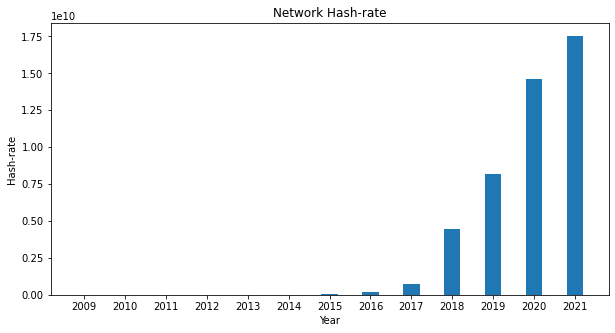

In [9]:
y=np.arange(len(Consumption["Year"]))
x=Consumption["Hash-rate"]
pt.figure(figsize = (10, 5))
pt.bar(y,x,0.4)
pt.xticks(y,Consumption["Year"])
pt.ylabel('Hash-rate')
pt.xlabel('Year')
pt.title("Network Hash-rate")
pt.show()

### Min and Max Efficiency(J/TH)

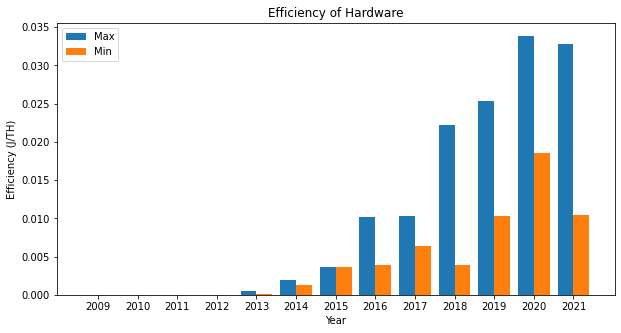

In [10]:
y=np.arange(len(Consumption["Year"]))
x=(1/Year_MinEF["Efficiency(J/TH)"])
z=(1/Year_MaxEF["Efficiency(J/TH)"])
pt.figure(figsize = (10, 5))

pt.bar(y-0.2, x, 0.4, label = "Max")
pt.bar(y+0.2, z, 0.4, label = "Min")

pt.xticks(y,Consumption["Year"])
pt.ylabel('Efficiency (J/TH)')
pt.xlabel('Year')
pt.title("Efficiency of Hardware")
pt.legend()
pt.show()

### Electricity Consumption

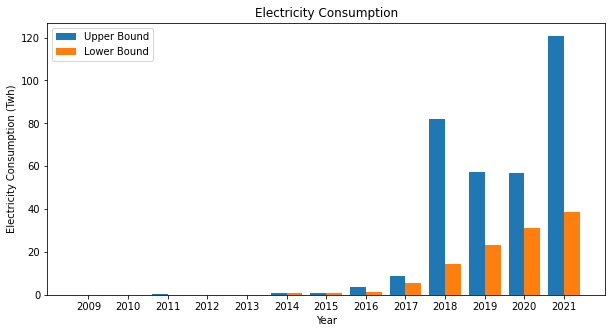

In [11]:
y=np.arange(len(Consumption["Year"]))
x=(Consumption["Upper Bound"]/10**9)
z=(Consumption["Lower Bound"]/10**9)
pt.figure(figsize = (10, 5))

pt.bar(y-0.2, x, 0.4, label = "Upper Bound")
pt.bar(y+0.2, z, 0.4, label = "Lower Bound")

pt.xticks(y,Consumption["Year"])
pt.ylabel('Electricity Consumption (Twh)')
pt.xlabel('Year')
pt.title("Electricity Consumption")
pt.legend()
pt.show()

### Network Hash-rate

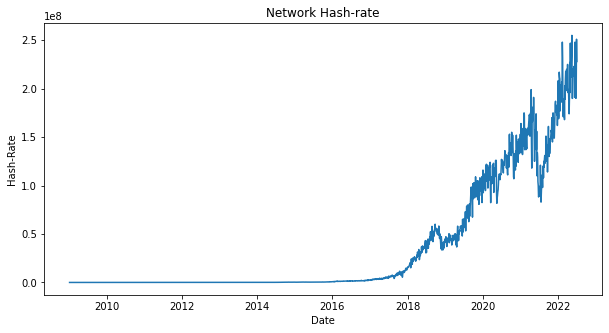

In [12]:
hr1=pd.read_csv("Hybrid Method - Hashrate.csv")
hr1.Timestamp = pd.to_datetime(hr1.Timestamp , format="%Y%m%")
x = hr1["Timestamp"]
y = hr1["hash-rate"]
pt.figure(figsize = (10, 5))  
pt.plot(x, y)
pt.xlabel("Date")  
pt.ylabel("Hash-Rate")  
pt.title("Network Hash-rate")  
pt.show()

## Carbon footprints

### Using mining pool infromation <hr>

**Reading the files required to computer emission**

In [13]:
emissions = pd.read_csv("emission.csv")
pools = pd.read_csv("Pool share sheet - Sheet1.csv")
emissions.head()

,Sources,emissions(gCO2 per kwh)
0,Coal,820
1,Biomass-co-firing,740
2,Natural Gas,490
3,Biomass,230
4,Solar PV-utility,48


**Scraping pool data from btc.com**

In [14]:
proxies = {}
url = "https://btc.com/stats/pool?percent_mode=2021#pool-history"
response = requests.get(url=url, proxies=proxies)
with open("PoolData.csv", "wb") as f:
    f.write(response.content)

**Calculating carbon emissions**

In [15]:
pools["Consumption (Upper)"] = (Consumption.loc[12, "Upper Bound"]*pools["share"])/100
pools["Consumption (Lower)"] = (Consumption.loc[12, "Lower Bound"]*pools["share"])/100
pools

,pools,share,location,Consumption (Upper),Consumption (Lower)
0,Foundry USA,6.785,USA,8.193710e+09,2.612676e+09
1,AntPool,14.614,china,1.764818e+10,5.627360e+09
2,F2Pool,15.054,china,1.817953e+10,5.796790e+09
3,Binance Pool,10.268,USA,1.239986e+10,3.953862e+09
4,ViaBTC,10.812,china,1.305680e+10,4.163338e+09
5,pOOLIN,10.992,china,1.327417e+10,4.232650e+09
6,BTC.com,9.433,USA,1.139149e+10,3.632331e+09
7,SlushPool,4.074,Brazil,4.919849e+09,1.568761e+09
8,unknown,4.904,Global,5.922175e+09,1.888366e+09
9,others,11.753,Global,1.419317e+10,4.525685e+09


In [16]:
pools["Carbon Footprints (Upper)"] = 0
for i in range(11):
    if(pools.loc[i, "location"] == "USA"):
        pools.loc[i, "Carbon Footprints (Upper)"] = pools.loc[i, "Consumption (Upper)"]*(0.21618*820 + 0.60346*820 + 0.37893*490 + 0.06137*24 + 0.18719*12 + 0.20935*50 + 0.03938*48 + 0.09135*12)
    elif(pools.loc[i, "location"] == "china"):
        pools.loc[i, "Carbon Footprints (Upper)"] = pools.loc[i, "Consumption (Upper)"]*(0.63633*820 + 0.66951*820 + 0.03159*490 + 0*24 + 0.04817*12 + 0.28278*50 + 0.03909*48 + 0.0726*12)
    elif(pools.loc[i, "location"] == "Brazil"):
        pools.loc[i, "Carbon Footprints (Upper)"] = pools.loc[i, "Consumption (Upper)"]*(0.04153*820 + 0.18776*820 + 0.1223*490 + 0.58054*24 + 0.02297*12 + 0.78928*50 + 0.01949*48 + 0.11279*12)
    elif(pools.loc[i, "location"] == "Japan"):
        pools.loc[i, "Carbon Footprints (Upper)"] = pools.loc[i, "Consumption (Upper)"]*(0.30652*820 + 0.67516*820 + 0.32072*490 + 0.09247*24 + 0.06324*12 + 0.26161*50 + 0.09257*48 + 0.00965*12)
    else:
        pools.loc[i, "Carbon Footprints (Upper)"] = pools.loc[i, "Consumption (Upper)"]*(0.3649*820 + 0.61743*820 + 0.22158*490 + 0.15284*24 + 0.0994*12 + 0.28317*50 + 0.03718*48 + 0.0659*12)

In [17]:
pools["Carbon Footprints (Lower)"] = 0
for i in range(11):
    if(pools.loc[i, "location"] == "USA"):
        pools.loc[i, "Carbon Footprints (Lower)"] = pools.loc[i, "Consumption (Lower)"]*(0.21618*820 + 0.60346*820 + 0.37893*490 + 0.06137*24 + 0.18719*12 + 0.20935*50 + 0.03938*48 + 0.09135*12)
    elif(pools.loc[i, "location"] == "china"):
        pools.loc[i, "Carbon Footprints (Lower)"] = pools.loc[i, "Consumption (Lower)"]*(0.63633*820 + 0.66951*820 + 0.03159*490 + 0*24 + 0.04817*12 + 0.28278*50 + 0.03909*48 + 0.0726*12)
    elif(pools.loc[i, "location"] == "Brazil"):
        pools.loc[i, "Carbon Footprints (Lower)"] = pools.loc[i, "Consumption (Lower)"]*(0.04153*820 + 0.18776*820 + 0.1223*490 + 0.58054*24 + 0.02297*12 + 0.78928*50 + 0.01949*48 + 0.11279*12)
    elif(pools.loc[i, "location"] == "Japan"):
        pools.loc[i, "Carbon Footprints (Lower)"] = pools.loc[i, "Consumption (Lower)"]*(0.30652*820 + 0.67516*820 + 0.32072*490 + 0.09247*24 + 0.06324*12 + 0.26161*50 + 0.09257*48 + 0.00965*12)
    else:
        pools.loc[i, "Carbon Footprints (Lower)"] = pools.loc[i, "Consumption (Lower)"]*(0.3649*820 + 0.61743*820 + 0.22158*490 + 0.15284*24 + 0.0994*12 + 0.28317*50 + 0.03718*48 + 0.0659*12)

In [18]:
pools

,pools,share,location,Consumption (Upper),Consumption (Lower),Carbon Footprints (Upper),Carbon Footprints (Lower)
0,Foundry USA,6.785,USA,8.193710e+09,2.612676e+09,7.169116e+12,2.285970e+12
1,AntPool,14.614,china,1.764818e+10,5.627360e+09,1.947887e+13,6.211100e+12
2,F2Pool,15.054,china,1.817953e+10,5.796790e+09,2.006534e+13,6.398105e+12
3,Binance Pool,10.268,USA,1.239986e+10,3.953862e+09,1.084930e+13,3.459446e+12
4,ViaBTC,10.812,china,1.305680e+10,4.163338e+09,1.441122e+13,4.595211e+12
5,pOOLIN,10.992,china,1.327417e+10,4.232650e+09,1.465114e+13,4.671713e+12
6,BTC.com,9.433,USA,1.139149e+10,3.632331e+09,9.967026e+12,3.178121e+12
7,SlushPool,4.074,Brazil,4.919849e+09,1.568761e+09,1.495174e+12,4.767564e+11
8,unknown,4.904,Global,5.922175e+09,1.888366e+09,5.541259e+12,1.766905e+12
9,others,11.753,Global,1.419317e+10,4.525685e+09,1.328026e+13,4.234592e+12


In [19]:
print("Carbon emission for the year 2021 ranges from ", sum(pools["Carbon Footprints (Lower)"])/10**12, " to ", sum(pools["Carbon Footprints (Upper)"])/10**12)

Carbon emission for the year 2021 ranges from  37.77327646129654  to  118.46219654856488


### Using upper and lower bounds <hr>

**Calculating lower and upper emission values**

In [20]:
UpperBound = emissions.loc[:3]
LowerBound = emissions.loc[4:]
up = sum(UpperBound["emissions(gCO2 per kwh)"])/len(UpperBound)
lw = sum(LowerBound["emissions(gCO2 per kwh)"])/len(LowerBound)

**Calculating min, max and avg value of carbon emission**

In [21]:
CarbonEmission = Consumption.copy()
CarbonEmission = CarbonEmission.drop(["Hash-rate", "Upper Bound", "Lower Bound"], axis=1)
CarbonEmission["Min Carbon Emission (Mt)"] = (CarbonEmission["Average"]*lw)/10**12
CarbonEmission["Max Carbon Emission (Mt)"] = (CarbonEmission["Average"]*up)/10**12
CarbonEmission["Avg Carbon Emission (Mt)"] = (CarbonEmission["Min Carbon Emission (Mt)"] + CarbonEmission["Max Carbon Emission (Mt)"])/2
CarbonEmission

,Year,Average,Min Carbon Emission (Mt),Max Carbon Emission (Mt),Avg Carbon Emission (Mt)
0,2009,5.615940e+02,1.495244e-08,3.201086e-07,1.675305e-07
1,2010,3.235969e+05,8.615766e-06,1.844502e-04,9.653299e-05
2,2011,1.905707e+08,5.073945e-03,1.086253e-01,5.684962e-02
3,2012,8.982979e+06,2.391718e-04,5.120298e-03,2.679735e-03
4,2013,7.437882e+07,1.980336e-03,4.239593e-02,2.218813e-02
5,2014,7.880226e+08,2.098110e-02,4.491729e-01,2.350770e-01
6,2015,9.732960e+08,2.591401e-02,5.547787e-01,2.903464e-01
7,2016,2.398204e+09,6.385219e-02,1.366977e+00,7.154144e-01
8,2017,6.993459e+09,1.862008e-01,3.986272e+00,2.086236e+00
9,2018,4.824584e+10,1.284546e+00,2.750013e+01,1.439234e+01


In [22]:
print("Carbon emission ranges from", sum(CarbonEmission["Min Carbon Emission (Mt)"]), "Mt to", sum(CarbonEmission["Max Carbon Emission (Mt)"]), "Mt.")

Carbon emission ranges from 5.950281046583159 Mt to 127.386298462062 Mt.
